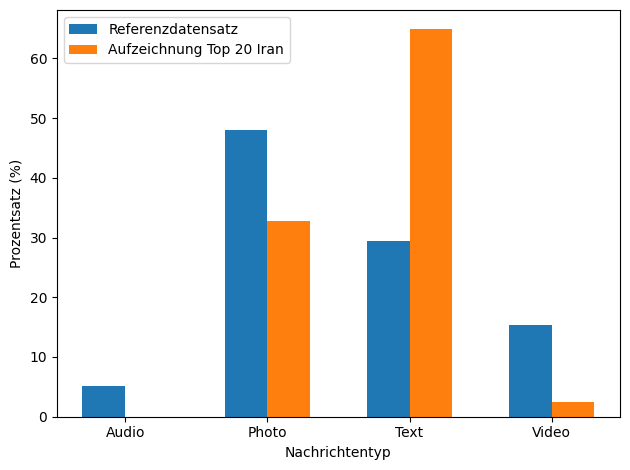

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

outfolder = r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images"

def plot_comparison(table1, table2):
    # Extrahieren der Daten aus Tabelle 1
    types1 = table1['Type']
    percentages1 = table1['Count (%)']

    # Extrahieren der Daten aus Tabelle 2
    types2 = table2['Typ']
    percentages2 = table2['Anzahl (%)']

    # Sortieren der Daten nach Typ
    sorted_indices1 = np.argsort(types1)
    sorted_indices2 = np.argsort(types2)
    types1 = np.array(types1)[sorted_indices1]
    percentages1 = np.array(percentages1)[sorted_indices1]
    types2 = np.array(types2)[sorted_indices2]
    percentages2 = np.array(percentages2)[sorted_indices2]

    # Breite der Balken
    bar_width = 0.3

    # Position der Balken auf der x-Achse
    x1 = np.arange(len(types1))
    x2 = x1 + bar_width

    # Plot für Prozentsätze der Nachrichten
    plt.figure()
    plt.bar(x1, percentages1, width=bar_width, label='Referenzdatensatz')
    plt.bar(x2, percentages2, width=bar_width, label='Aufzeichnung Top 20 Iran')
    plt.xlabel('Nachrichtentyp')
    plt.ylabel('Prozentsatz (%)')
    # plt.title('Vergleich der Nachrichtenprozentsätze')
    plt.xticks(x1 + bar_width / 2, types1)
    plt.legend()

    # Layout anpassen und Diagramm anzeigen
    plt.tight_layout()
    plt.savefig(os.path.join(outfolder,"msgTypes_IranVSRef"), dpi=300)
    plt.show()

# Beispiel-Daten für die Tabellen
table1 = {
    'Type': ['Text', 'Photo', 'Video', 'Audio'],
    'Count (%)': [29.4, 48, 15.4, 5.1]
}

table2 = {
    'Typ': ['Foto', 'Audio', 'Video', 'Text'],
    'Anzahl (%)': [32.73, 0, 2.42, 64.85]
}

# Diagramm erstellen
plot_comparison(table1, table2)


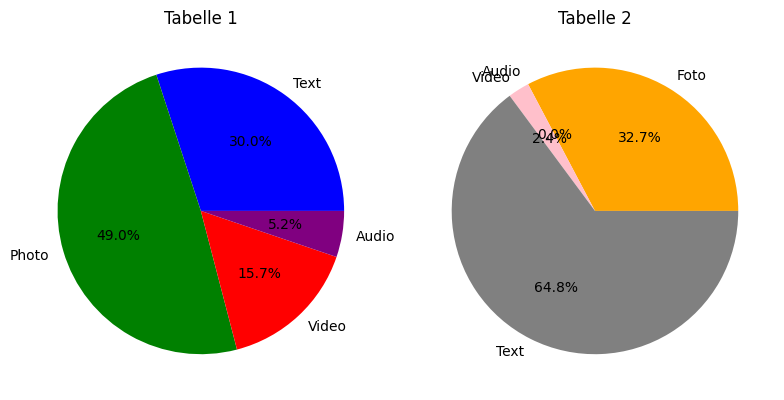

In [2]:
import matplotlib.pyplot as plt

def plot_comparison(table1, table2):
    # Extrahieren der Daten aus Tabelle 1
    types1 = table1['Type']
    percentages1 = table1['Count (%)']

    # Extrahieren der Daten aus Tabelle 2
    types2 = table2['Typ']
    percentages2 = table2['Anzahl (%)']

    # Plot für Prozentsätze der Nachrichten
    plt.figure(figsize=(8, 6))

    # Tortendiagramm für Tabelle 1
    plt.subplot(1, 2, 1)
    plt.pie(percentages1, labels=types1, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
    plt.title('Tabelle 1')

    # Tortendiagramm für Tabelle 2
    plt.subplot(1, 2, 2)
    plt.pie(percentages2, labels=types2, autopct='%1.1f%%', colors=['orange', 'brown', 'pink', 'gray'])
    plt.title('Tabelle 2')

    # Layout anpassen und Diagramm anzeigen
    plt.tight_layout()
    plt.show()

# Beispiel-Daten für die Tabellen
table1 = {
    'Type': ['Text', 'Photo', 'Video', 'Audio'],
    'Count (%)': [29.4, 48, 15.4, 5.1]
}

table2 = {
    'Typ': ['Foto', 'Audio', 'Video', 'Text'],
    'Anzahl (%)': [32.73, 0, 2.42, 64.85]
}

# Diagramm erstellen
plot_comparison(table1, table2)


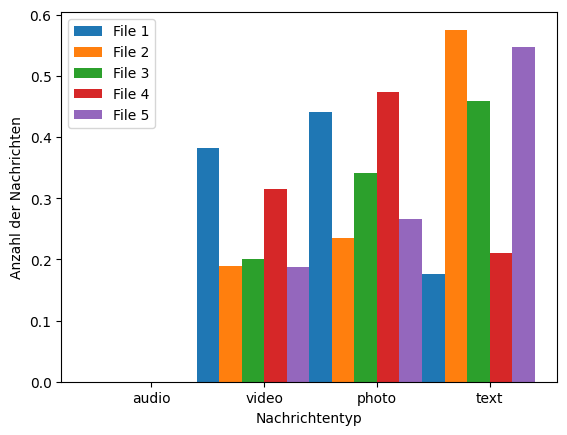

In [25]:
import json
import matplotlib.pyplot as plt

rootFolder = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Aufzeichnungen_5IranianGroups_Night\Setup2"

# Pfade zu den JSON-Dateien
json_files = os.listdir(rootFolder)

# Liste für jeden Nachrichtentyp
message_types = ["audio", "video", "photo", "text"]
message_counts = []

# JSON-Daten laden und Nachrichtenzähler aktualisieren
for json_file in json_files:
    with open(os.path.join(rootFolder,json_file), "r") as file:
        data = json.load(file)
        type_analysis = data["TypeAnalysis"]
        counts = [type_analysis[message_type]["countProzent"] for message_type in message_types]
        message_counts.append(counts)

# Balkendiagramm erstellen
fig, ax = plt.subplots()
width = 0.2
x = np.arange(len(message_types))

for i in range(len(message_counts)):
    ax.bar(x + i * width, message_counts[i], width, label=f"File {i+1}")

ax.set_xticks(x + width * len(message_counts) / 2)
ax.set_xticklabels(message_types)
ax.set_xlabel("Nachrichtentyp")
ax.set_ylabel("Anzahl der Nachrichten")
ax.legend()

plt.show()


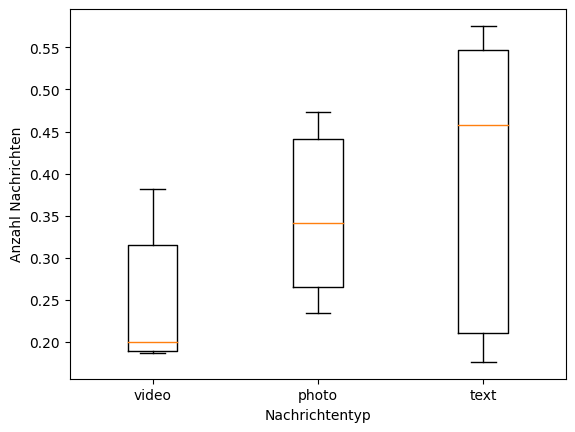

In [48]:
import json
import matplotlib.pyplot as plt

rootFolder = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Aufzeichnungen_5IranianGroups_Night\Setup2"

# Pfade zu den JSON-Dateien
json_files = os.listdir(rootFolder)

# Liste für jeden Nachrichtentyp
message_types = ["video", "photo", "text"]
message_counts = {message_type: [] for message_type in message_types}

# JSON-Daten laden und Nachrichtenzähler aktualisieren
for json_file in json_files:
    with open(os.path.join(rootFolder, json_file), "r") as file:
        data = json.load(file)
        type_analysis = data["TypeAnalysis"]

        for message_type in message_types:
            count = type_analysis[message_type]["countProzent"]
            message_counts[message_type].append(count)

# Boxplots erstellen
fig, ax = plt.subplots()
colors = ["#E45756", "#72B7B2", "#F58518"]
boxplots = ax.boxplot(message_counts.values())
# for box, color in zip(boxplots["boxes"], colors):
#     box.set(facecolor=color)

ax.set_xticklabels(message_counts.keys())
ax.set_xlabel("Nachrichtentyp")
ax.set_ylabel("Anzahl Nachrichten")
# ax.set_title("Anzahl der Nachrichten pro Typ")


plt.style.use("default")  # Beispiel für einen anderen Plot-Stil

plt.savefig(r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images\reprodSzenario2_relativ.png", dpi=300)
plt.show()


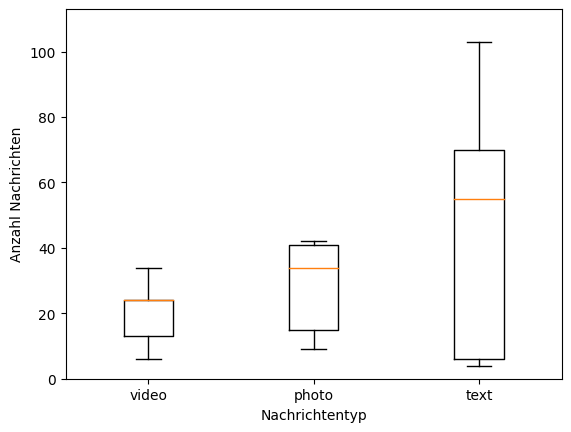

In [49]:
import json
import matplotlib.pyplot as plt

rootFolder = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Aufzeichnungen_5IranianGroups_Night\Setup2"

# Pfade zu den JSON-Dateien
json_files = os.listdir(rootFolder)

# Liste für jeden Nachrichtentyp
message_types = ["video", "photo", "text"]
message_counts = {message_type: [] for message_type in message_types}

# JSON-Daten laden und Nachrichtenzähler aktualisieren
for json_file in json_files:
    with open(os.path.join(rootFolder, json_file), "r") as file:
        data = json.load(file)
        type_analysis = data["TypeAnalysis"]

        for message_type in message_types:
            count = type_analysis[message_type]["count"]
            message_counts[message_type].append(count)

# Boxplots erstellen
fig, ax = plt.subplots()
colors = ["#E45756", "#72B7B2", "#F58518"]
boxplots = ax.boxplot(message_counts.values())
# for box, color in zip(boxplots["boxes"], colors):
#     box.set(facecolor=color)

ax.set_xticklabels(message_counts.keys())
ax.set_xlabel("Nachrichtentyp")
ax.set_ylabel("Anzahl Nachrichten")
# ax.set_title("Anzahl der Nachrichten pro Typ")
ax.set_ylim(0, max([max(counts) for counts in message_counts.values()]) + 10)

plt.style.use("default")  # Beispiel für einen anderen Plot-Stil

plt.savefig(r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images\reprodSzenario2.png", dpi=300)
plt.show()
